# Поиска инсайтов и точек роста

С данными сервиса доставки еды «Всё.из.кафе» вы уже работали в одном из проектов базового курса. Тогда вы описывали ключевые метрики продукта — количество пользователей, заказов и выручку.

Однако конкуренты сервиса не дремлют, и руководство ждёт от продукта роста. Найти инсайты, которые позволят сервису повысить показатель удержания пользователей и улучшить взаимодействие с партнёрами, поручено продуктовому аналитику, то есть вам.

Вам необходимо помочь бизнесу ответить на следующие вопросы:
- Как ведут себя пользователи? Как наиболее эффективно выстроить работу с ними, чтобы они продолжали пользоваться продуктом?
- Какой путь проходят пользователи в сервисе? Где «проваливаются»?
- Как улучшить взаимодействие с партнёрами-ресторанами?

### Задачи 

В рамках данного проекта вы проведёте комплексный анализ данных:
- изучите пользовательский путь и проанализируете конверсии через воронки;
- сегментируете пользователей с помощью RFM-модели для оценки лояльности и поведения клиентов;
- кластеризуете рестораны методом K-Means, чтобы выделить группы с разными моделями работы и разработать персонализированные маркетинговые стратегии.

Такой подход позволит ближе познакомиться с работой сервиса, выявить узкие места и предложить решения для удержания пользователей и повышения эффективности сотрудничества с ресторанами.


### Данные

Данные включают следующие сведения:
      
- `visitor_uuid` — идентификатор посетителя. Это идентификатор, который присваивается системой любому новому пользователю вне зависимости от того, зарегистрировался он в продукте или нет.
- `user_id` — идентификатор зарегистрированного пользователя. Присваивается посетителю после создания учётной записи: ввода логина, пароля, адреса доставки и контактных данных.
- `device_type` — тип платформы, с которой посетитель зашёл в продукт.
- `city_id` — город, из которого посетитель зашёл в сервис.
- `source` — рекламный источник привлечения посетителя.
- `first_date` — дата первого посещения продукта.
- `visit_id` — уникальный идентификатор сессии.
- `event` — название аналитического события.
- `datetime` — дата и время события.
- `rest_id` — уникальный идентификатор ресторана (заполняется для заказов, карточек ресторанов и блюд).
- `object_id` — уникальный идентификатор блюда (заполняется для заказов и карточек блюд).
- `order_id` — уникальный идентификатор заказа.
- `revenue` — выручка от заказа (в рублях). Это та сумма, которую пользователь видит при оплате.
- `delivery` — стоимость доставки (в рублях).
- `commission` — комиссия, которую «Всё.из.кафе» берёт с выручки ресторана, в процентах.

    
### План проекта
- Загрузка данных и их предобработка.
- Анализ пользовательского пути новых пользователей.
- RFM сегментация.
- K-Means кластеризация.
- Итоговый вывод и рекомендации.

## 1. Загрузка данных и их предобработка

Загрузите данные и получите первую информацию о них. Проведите необходимую предобработку. Основную информацию о данных и этапы предобработки зафиксируйте в кратком промежуточном выводе.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('insides_data.csv', parse_dates= ['first_date', 'datetime'])

df.head(5)

,visitor_uuid,user_id,device_type,city_id,source,first_date,visit_id,event,datetime,rest_id,object_id,order_id,revenue,delivery,commission
0,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,authorization,2021-05-01 16:07:53,NaN,NaN,NaN,NaN,NaN,NaN
1,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,reg_page,2021-05-01 16:09:16,NaN,NaN,NaN,NaN,NaN,NaN
2,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,confirm_phone,2021-05-01 16:09:19,NaN,NaN,NaN,NaN,NaN,NaN
3,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,login,2021-05-01 16:09:23,NaN,NaN,NaN,NaN,NaN,NaN
4,01b5da38-3022-48ff-87c0-5519247fef1b,567317.0,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:09:34,2c6095730b514c189ee41c65f03febc3,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205510 entries, 0 to 205509
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   visitor_uuid  205510 non-null  object        
 1   user_id       205510 non-null  float64       
 2   device_type   205510 non-null  object        
 3   city_id       205510 non-null  int64         
 4   source        205510 non-null  object        
 5   first_date    205510 non-null  datetime64[ns]
 6   visit_id      205510 non-null  int64         
 7   event         205510 non-null  object        
 8   datetime      205510 non-null  datetime64[ns]
 9   rest_id       166915 non-null  object        
 10  object_id     21308 non-null   float64       
 11  order_id      7008 non-null    float64       
 12  revenue       7008 non-null    float64       
 13  delivery      7008 non-null    float64       
 14  commission    21308 non-null   float64       
dtypes: datetime64[ns]

In [4]:
(pd.DataFrame({'Количество пропусков': df.isnull().sum(), 
               'Доля пропусков': df.isnull().mean().round(4), 
               'Количество дубликатов': df.duplicated().sum()}).style.background_gradient(cmap='coolwarm'))

,Количество пропусков,Доля пропусков,Количество дубликатов
visitor_uuid,0,0.000000,0
user_id,0,0.000000,0
device_type,0,0.000000,0
city_id,0,0.000000,0
source,0,0.000000,0
first_date,0,0.000000,0
visit_id,0,0.000000,0
event,0,0.000000,0
datetime,0,0.000000,0
rest_id,38595,0.187800,0


In [5]:
print(f'Количество неявных дубликатов: {df.duplicated(subset= df.columns[:]).sum()}')


Количество неявных дубликатов: 0


In [6]:
#print(f'Интервал дат в датасете df(дата первого посещения продукта): с {min(df['first_date'].dt.date)} по {max(df['first_date'].dt.date)}')
#print(f'Интервал дат в датасете df(дата и время события): с {min(df['datetime'].dt.date)} по {max(df['datetime'].dt.date)}')

Ознакомившись с датасетом `df`, можно сказать, что данные соответствуют описанию. 
- У нас есть 205510 строк и 15 столбцов.
- Типы данных `datetime64[ns](2)`, `float64(6)`, `int64(2)`, `object(5)`

В столбцах:
- `rest_id` — уникальный идентификатор ресторана (заполняется для заказов, карточек ресторанов и блюд). Есть 38595 пропусков и доля пропусков составляет 18%.
- `object_id` — уникальный идентификатор блюда (заполняется для заказов и карточек блюд). Есть 184202 пропусков и доля пропусков составляет 89%.
- `order_id` — уникальный идентификатор заказа. Есть 198502 пропусков и доля пропусков составляет 96%.
- `revenue` — выручка от заказа (в рублях). Это та сумма, которую пользователь видит при оплате. Есть 198502 пропусков и доля пропусков составляет 96%.
- `delivery` — стоимость доставки (в рублях). Есть 198502 пропусков и доля пропусков составляет 96%.
- `commission` — комиссия, которую «Всё.из.кафе» берёт с выручки ресторана, в процентах.  Есть 184202 пропусков и доля пропусков составляет 89%.

В полях `rest_id`, `object_id`, `order_id`, `revenue`, `delivery` и `commission` есть значительное количество пропусков. Это может указывать на проблемы с данными, такие как неполные записи или ошибки в сборе данных.

Необходимо выяснить, почему в некоторых полях так много пропусков. Возможно, это связано с ошибками в сборе данных или с особенностями бизнес-процесса.

В остальном на первый взгляд, все хорошо.

---

## 2. Анализ пользовательского пути

Маркетологи стали замечать следующее: деньги на рекламу по-прежнему тратятся, а заказов стало меньше. И это несмотря на то, что приложение скачивается и устанавливается так же активно, как раньше. Складывается ощущение, что пользователи где-то теряются. При этом доля заказов с десктопной версии приложения увеличилась по сравнению с мобильной.

Разработчики говорят, что последние обновления мобильной версии приложения не должны были повлиять на каталог блюд или его выбор для заказа и последующей оплаты доставки, так как изменения касались нового алгоритма подтверждения мобильного телефона и адреса доставки.

С помощью воронок изучите общий пользовательский путь новых пользователей, затем сравните поведение пользователей мобильной и десктопной версий приложения. 

**Задача 2.1.** Постройте и визуализируйте общую воронку (по всем данным), затем опишите пользовательский путь: какие этапы представлены, какова их последовательность, на каком (или на каких) этапах теряется большая часть новых пользователей.
    
При решении постройте две воронки: 
- **классическую воронку** — доля от первого шага в процентах
- **step-by-step** — с конверсией от предыдущего этапа.

Предполагается, что пользователь проходит такой путь к оформлению доставки блюда из ресторанов:
1. `authorization` — авторизация пользователя — запуск приложения.
2. `main_page` — загрузка основной страницы приложения.
2. `reg_page` — переход на страницу регистрации.
2. `confirm_phone` — подтверждение телефона (окончание процесса регистрации).
2. `object_page` — страница блюда.
2. `add_to_cart` — переход в корзину.
2. `order` — оформление заказа.    

In [7]:
steps = ['authorization', 'main_page', 'reg_page', 'confirm_phone', 'object_page', 'add_to_cart', 'order']

df_event = df[df['event'].isin(steps)].copy()
df_counts = df_event.groupby('event')['visitor_uuid'].nunique().reindex(steps)

full_df = pd.DataFrame({
   'step': df_counts.index,
   'users': df_counts.values
})

full_df['conversion_first_%'] = round((full_df['users'] / full_df['users'][0]) * 100, 1)
full_df['conversion_previous_%'] = round((full_df['users'] / full_df['users'].shift(1)) * 100, 1)

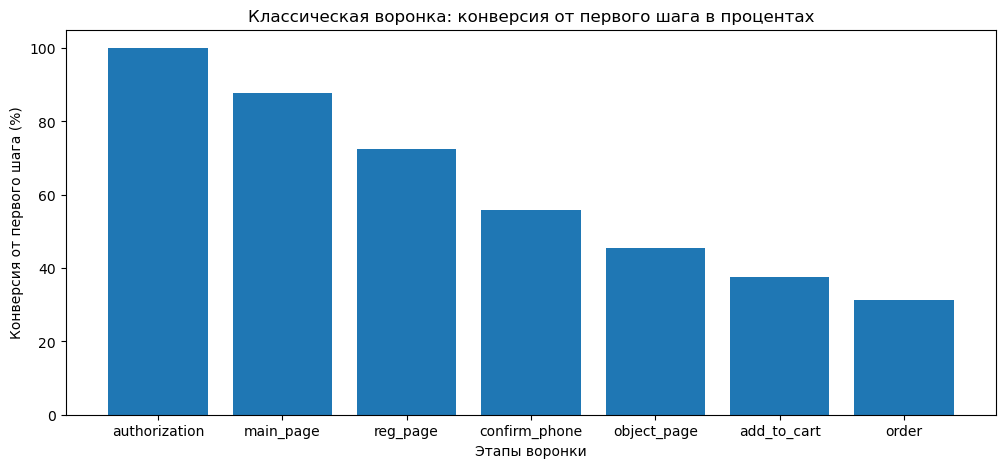

In [8]:
plt.figure(figsize=(12, 5))

plt.bar(full_df['step'], full_df['conversion_first_%'])

plt.title('Классическая воронка: конверсия от первого шага в процентах')
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

Последовательность этапов следующая:
`Authorization` → `Main Page` → `Reg Page` → `Confirm Phone` → `Object Page` → `Add to Cart` → `Order`

На графике видно, что потеря пользователей происходит почти равномерно на всем пути. Хотя, между `Reg Page` → `Confirm Phone`, видна большая потеря в 17%, а между `Main Page` → `Reg Page` 15%.

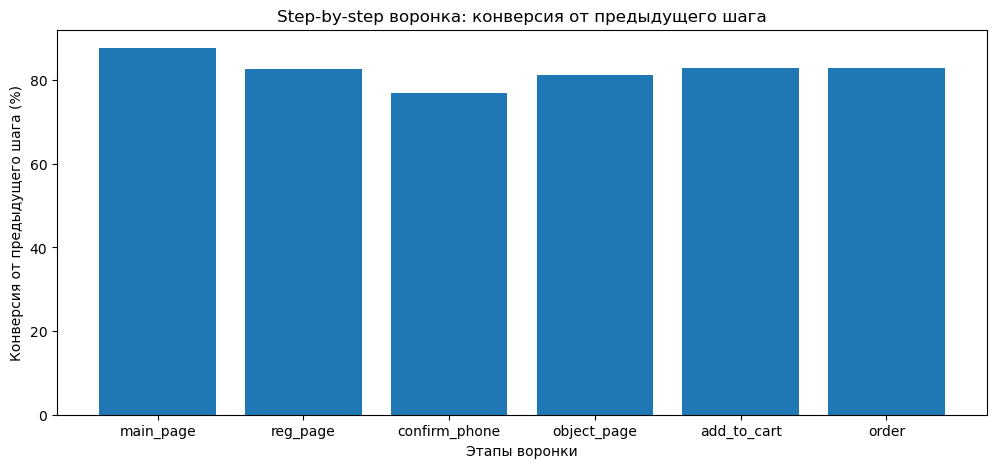

In [9]:
plt.figure(figsize=(12, 5))

plt.bar(full_df['step'][1:], full_df['conversion_previous_%'][1:])

plt.title('Step-by-step воронка: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

Наибольшая потеря пользователей происходит на этапе `Confirm Phone`, что может быть связано с требованиями к подтверждению номера телефона. Это может быть барьером для некоторых пользователей, особенно если процесс подтверждения кажется сложным или требует дополнительных действий.



**Задача 2.2.** Сравните пользовательский путь в двух приложениях: в мобильной версии и десктопной. Для этого постройте и визуализируйте **две воронки step-by-step**: для новых пользователей **мобильной** и **десктопной** версий приложения.
    
Сравните результаты между собой и проанализируйте, есть ли различия в пользовательском пути для различных приложений. Результаты сравнения опишите в небольшом **промежуточном выводе**.

In [10]:
df_des = df[(df['device_type'] == 'Desktop') & (df['event'].isin(steps))].copy()
df_des_counts = df_des.groupby('event')['visitor_uuid'].nunique().reindex(steps)

df_event_des = pd.DataFrame({
   'step': df_des_counts.index,
   'users_des': df_des_counts.values
})

df_event_des['conversion_first_des_%'] = round((df_event_des['users_des'] / df_event_des['users_des'][0]) * 100, 1)
df_event_des['conversion_previous_des_%'] = round((df_event_des['users_des'] / df_event_des['users_des'].shift(1)) * 100, 1)

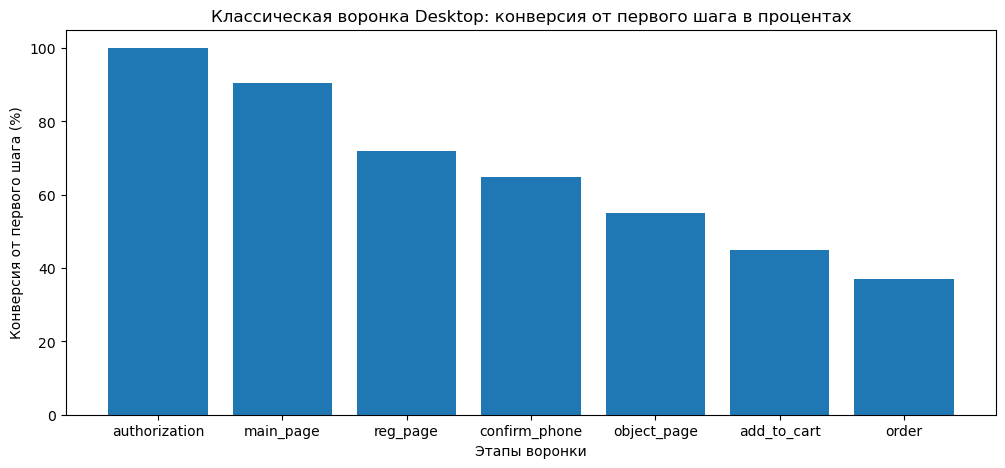

In [11]:
plt.figure(figsize=(12, 5))

plt.bar(df_event_des['step'], df_event_des['conversion_first_des_%'])

plt.title('Классическая воронка Desktop: конверсия от первого шага в процентах')
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

Последовательность этапов Desktop следующая:
`Authorization` → `Main Page` → `Reg Page` → `Confirm Phone` → `Object Page` → `Add to Cart` → `Order`

На графике видно, что потеря пользователей происходит почти равномерно на всем пути. Хотя, между `Main Page` → `Reg Page`, видна большая потеря в 19%.

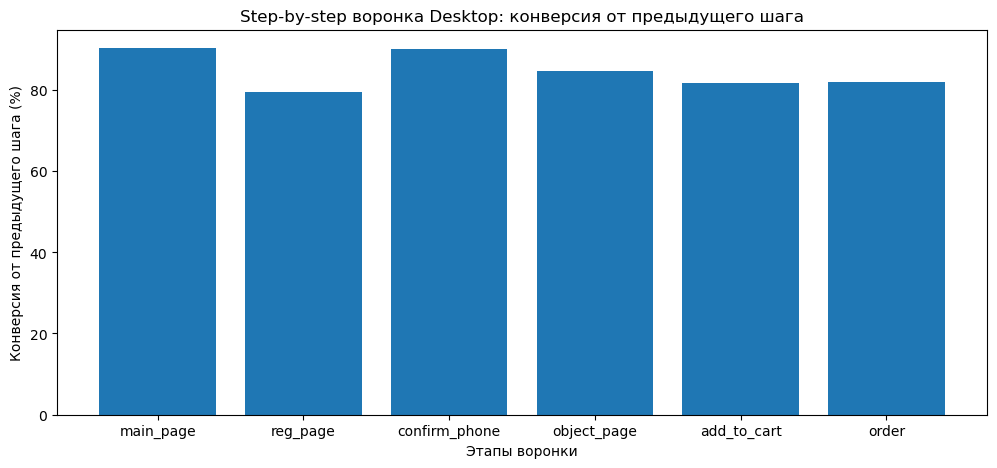

In [12]:
plt.figure(figsize=(12, 5))

plt.bar(df_event_des['step'][1:], df_event_des['conversion_previous_des_%'][1:])

plt.title('Step-by-step воронка Desktop: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

На диаграмме `Desktop` видно, что наибольшая потеря пользователей происходит на этапе `reg_page` (Страница регистрации). Это означает, что после того как пользователь попадает на главную страницу, значительная часть пользователей не переходит к регистрации. Это может быть связано с различными факторами, такими как сложность процесса регистрации, необходимость предоставления личной информации или другие барьеры, которые могут отпугнуть пользователей.

In [13]:
df_mob = df[(df['device_type'] == 'Mobile') & (df['event'].isin(steps))].copy()
df_mob_counts = df_mob.groupby('event')['visitor_uuid'].nunique().reindex(steps)

df_event_mob = pd.DataFrame({
   'step': df_mob_counts.index,
   'users_mob': df_mob_counts.values
})

df_event_mob['conversion_first_mob_%'] = round((df_event_mob['users_mob'] / df_event_mob['users_mob'][0]) * 100, 1)
df_event_mob['conversion_previous_mob_%'] = round((df_event_mob['users_mob'] / df_event_mob['users_mob'].shift(1)) * 100, 1)

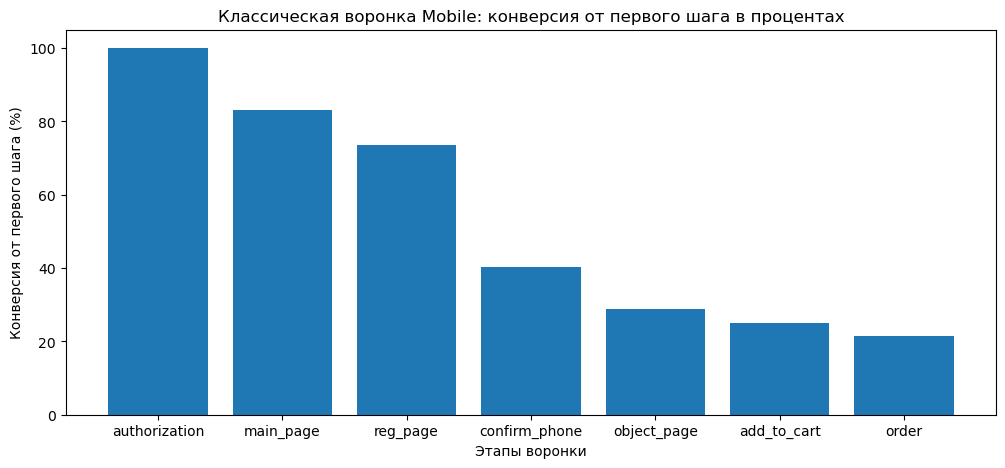

In [14]:
plt.figure(figsize=(12, 5))

plt.bar(df_event_mob['step'], df_event_mob['conversion_first_mob_%'])

plt.title('Классическая воронка Mobile: конверсия от первого шага в процентах')
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

Большая часть новых пользователей теряется на этапе `Reg Page` → `Confirm Phone` целых 33%. Это видно по резкому снижению количества пользователей на этом этапе по сравнению с предыдущими. Также, на этапе `Authorization` → `Main Page`, заметно падение на 17%







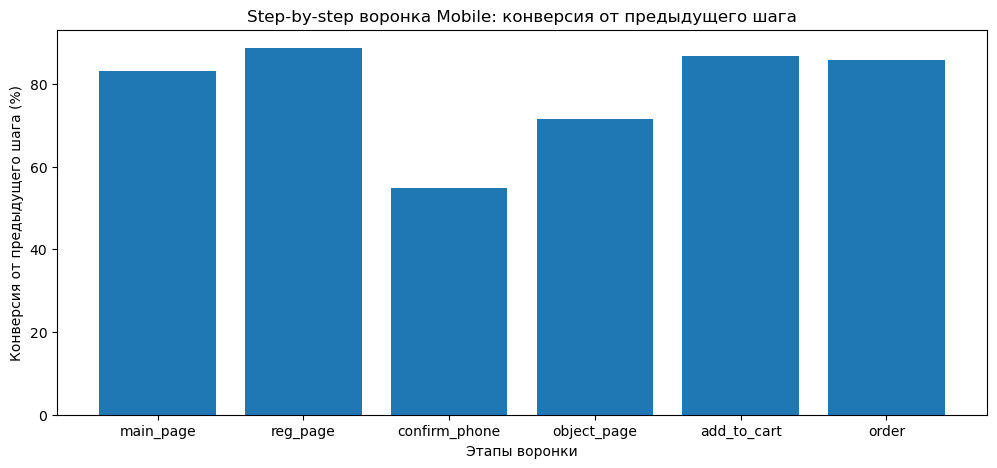

In [15]:
plt.figure(figsize=(12, 5))

plt.bar(df_event_mob['step'][1:], df_event_mob['conversion_previous_mob_%'][1:])

plt.title('Step-by-step воронка Mobile: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')
plt.show()

На этапе `confirm_phone` (Подтверждение телефона) `Mobile` теряется значительная часть новых пользователей. Конверсия на этом этапе составляет всего 60%, что значительно ниже по сравнению с другими этапами. Это может указывать на то, что процесс подтверждения телефона является сложным или неудобным для пользователей, что приводит к их оттоку.







<Figure size 1200x500 with 0 Axes>

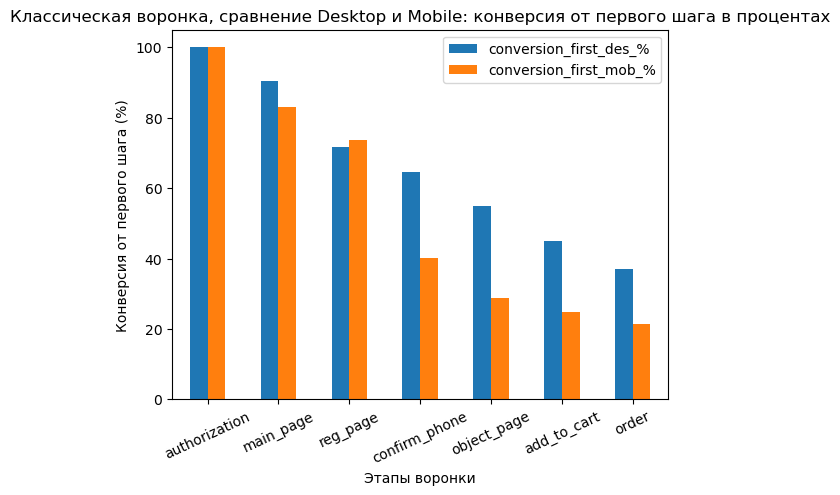

In [16]:
df_des_mob = pd.merge(df_event_des, df_event_mob, on= 'step')

plt.figure(figsize=(12, 5))

df_des_mob.plot(kind= 'bar', x= 'step', y= ['conversion_first_des_%', 'conversion_first_mob_%'], rot= 25)

plt.title('Классическая воронка, сравнение Desktop и Mobile: конверсия от первого шага в процентах')
plt.ylabel('Конверсия от первого шага (%)')
plt.xlabel('Этапы воронки')

plt.show()

Пользовательский путь для `Desktop` приложения значительно более успешен на всех этапах воронки по сравнению с `Mobile` приложением. Это может быть связано с различными факторами, такими как удобство использования, дизайн интерфейса, скорость загрузки страниц и другие аспекты пользовательского опыта.

На каждом этапе воронки `Mobile` приложение теряет больше пользователей, чем `Desktop`. Это может указывать на проблемы с мобильным интерфейсом или процессом взаимодействия, которые требуют улучшения.

Наиболее критическими этапами для `Mobile` приложения являются `"Подтверждение телефона"`, где потери пользователей особенно высоки.

Для улучшения конверсии в `Mobile` приложении рекомендуется провести анализ пользовательского опыта и внести соответствующие изменения в интерфейс и процесс взаимодействия.

<Figure size 1200x500 with 0 Axes>

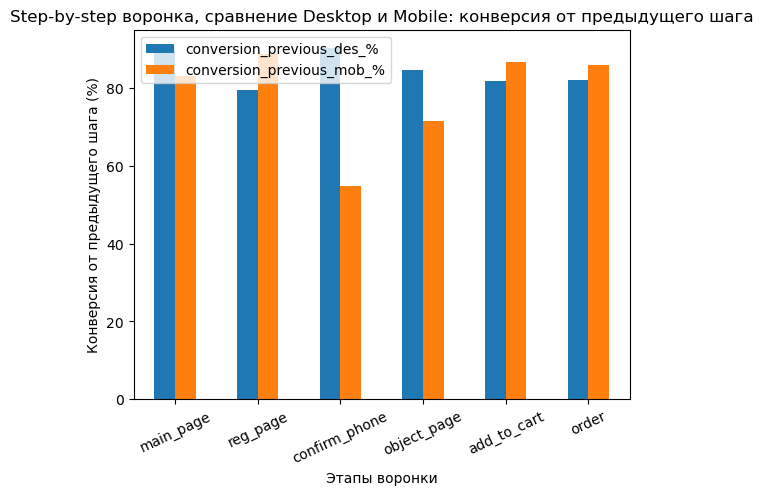

In [17]:
plt.figure(figsize=(12, 5))

df_des_mob[1:].plot(kind= 'bar', x= 'step', y= ['conversion_previous_des_%', 'conversion_previous_mob_%'], rot= 25)

plt.title('Step-by-step воронка, сравнение Desktop и Mobile: конверсия от предыдущего шага')
plt.ylabel('Конверсия от предыдущего шага (%)')
plt.xlabel('Этапы воронки')

plt.show()

Конверсия на десктопной платформе, как правило, выше на всех этапах воронки по сравнению с мобильной. Это может указывать на более удобный интерфейс и лучшее восприятие информации пользователями на десктопах.

На этапе `main_page` и `reg_page` разница в конверсии между мобильной и десктопной платформами незначительна, что говорит о том, что пользователи на обеих платформах одинаково заинтересованы на начальных этапах.

Однако, начиная с этапа `confirm_phone`, наблюдается заметное снижение конверсии на мобильной платформе, что может указывать на возможные проблемы с пользовательским интерфейсом или сложностью ввода данных.


---

## 3. RFM сегментация

У сервиса доставки еды не такое высокое удержание пользователей: в первый день возвращается около 14% посетителей, а на седьмой день и того меньше — около 4–5%. Маркетологи хотят запустить несколько рекламных кампаний, направленных на удержание платящих пользователей и их возврат в сервис, если они давно не совершали заказы.

Для этого необходимо сегментировать пользователей на различные поведенческие сегменты с помощью RFM-сегментации по трём показателям: 
- **давность** (Recency), 
- **частота покупок** (Frequency), 
- **сумма трат** (Monetary).

В качестве даты анализа установите **03 июля 2021 года**.

**Задача 3.1.** Для каждого покупателя посчитайте:
- количество дней с последней покупки — давность (R);
- частоту покупок (F);
- стоимость всех покупок — сумму трат (M).
    
В качестве даты анализа установите **03 июля 2021 года**. После этого постройте три гистограммы и проанализируйте их.

In [18]:
df_orders = df[df['event'] == 'order'].copy()
df_orders['N_orders'] = pd.to_datetime('2021-07-03') - df['datetime']

In [19]:
df_rfm = df_orders.groupby('visitor_uuid').agg(
    recency = ('N_orders', lambda x: x.min().days),
    frequency = ('datetime', 'count'),
    monetary_value = ('revenue', 'sum')
).reset_index()

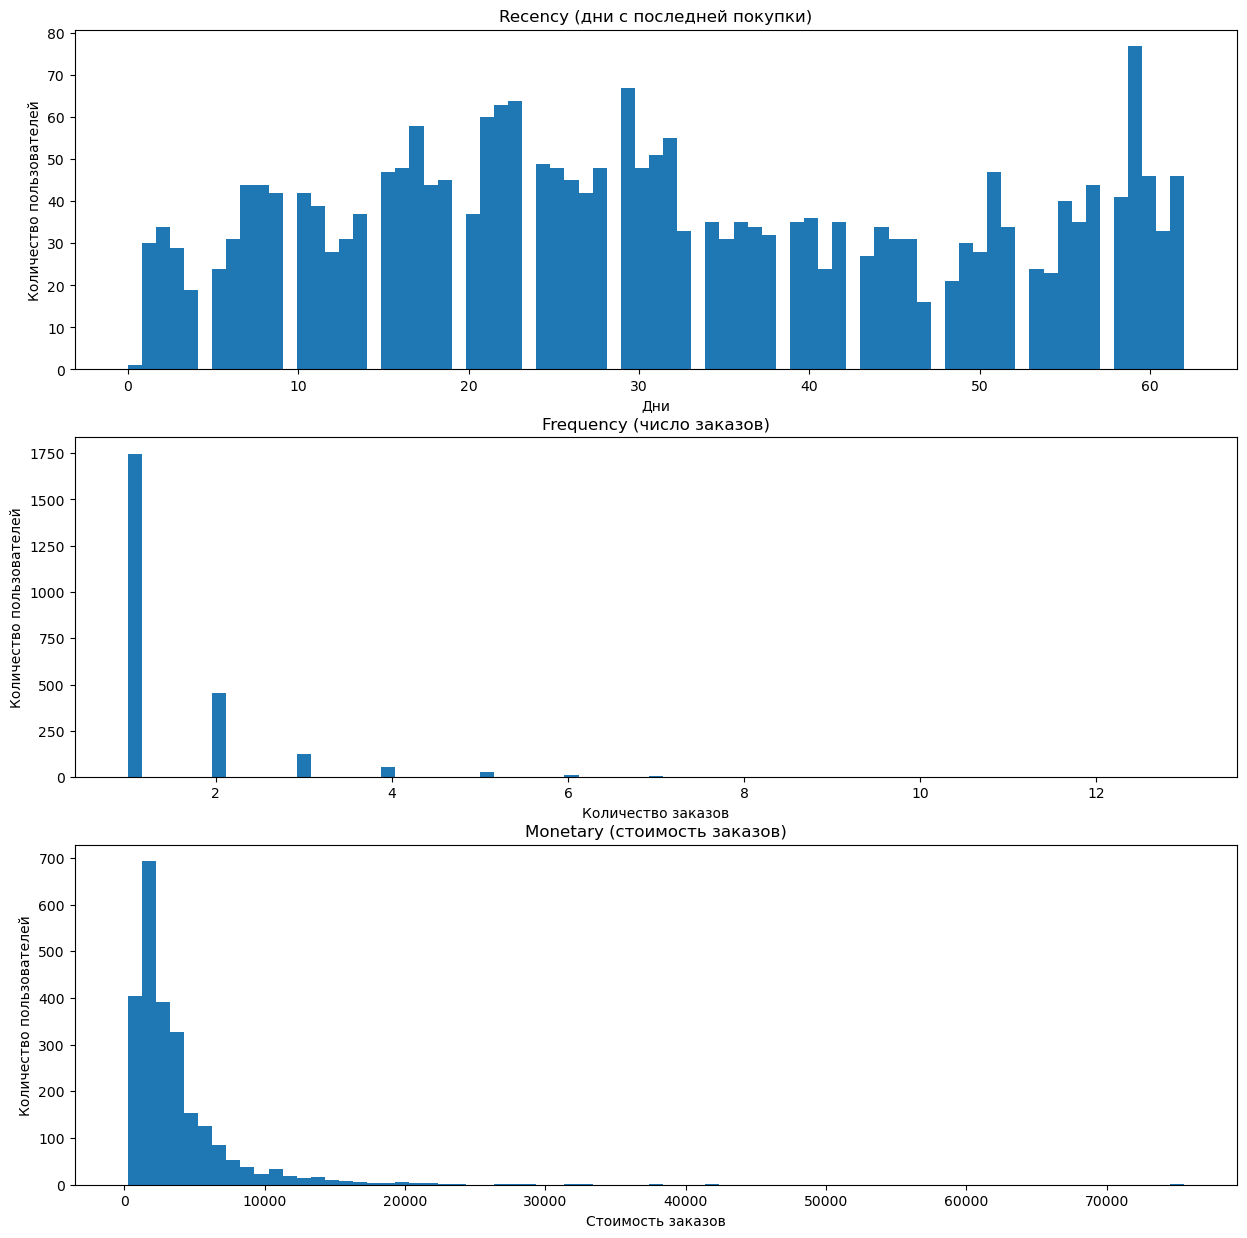

In [20]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

axes[0].hist(df_rfm['recency'], bins=75)
axes[0].set_title('Recency (дни с последней покупки)')
axes[0].set_xlabel('Дни')
axes[0].set_ylabel('Количество пользователей')

axes[1].hist(df_rfm['frequency'], bins=75)
axes[1].set_title('Frequency (число заказов)')
axes[1].set_xlabel('Количество заказов')
axes[1].set_ylabel('Количество пользователей')

axes[2].hist(df_rfm['monetary_value'], bins=75)
axes[2].set_title('Monetary (стоимость заказов)')
axes[2].set_xlabel('Стоимость заказов')
axes[2].set_ylabel('Количество пользователей')

plt.show()

Гистограмма "`Recency` (дни с последней покупки)":
Показывает распределение клиентов по количеству дней, прошедших с момента их последней покупки.
Большинство клиентов сделали покупку в течение последних 60 дней, что указывает на высокую активность клиентов.
Пик на 60 днях может свидетельствовать о том, что многие клиенты делают покупки примерно раз в два месяца.

Гистограмма "`Frequency` (число заказов)":
Отображает количество заказов, сделанных клиентами. Большинство клиентов сделали от 1 до 10 заказов, что указывает на то, что большинство клиентов являются регулярными, но не слишком частыми покупателями.
Пик на 10 заказах может свидетельствовать о том, что многие клиенты делают около 10 покупок.

Гистограмма "`Monetary` (стоимость заказов)":
Показывает распределение клиентов по общей стоимости их заказов. Большинство клиентов потратили от 0 до 10000 рублей, что указывает на то, что большинство клиентов делают покупки на небольшие суммы. Пик на 10000 рублей может свидетельствовать о том, что многие клиенты тратят около 10000 рублей на свои покупки.

Эти гистограммы помогают понять поведение клиентов и могут быть использованы для сегментации клиентов и разработки маркетинговых стратегий.

**Задача 3.2.** Выделите **RFM-сегменты** и изучите распределение пользователей по ним.
    
Примените следующие подходы к выделению RFM сегментов:
- **Recency** — разделите на три равные группы.
- **Frequency** —  разделите на три группы: 
    - пользователи с 1 заказом (F-сегмент с небольшим количеством заказов);
    - пользователи с 2 заказами (F-сегмент со средним количеством заказов);
    - пользователи с 3 и более заказами (F-сегмент с большим количеством заказов).
- **Monetary** — разделите на три группы по 33-му и 66-му перцентилям.
    
После этого посчитайте количество покупателей в каждом сегменте, сделайте промежуточные выводы и напишите рекомендации.

In [21]:
df_rfm['r'] = pd.cut(df_rfm['recency'], bins= 3, labels= [3, 2, 1])
df_rfm['f'] = pd.cut(df_rfm['frequency'], [0, 1, 2, float('inf')], labels= [1, 2, 3])
df_rfm['m'] = pd.qcut(df_rfm['monetary_value'], q= 3, labels= [1, 2, 3])

In [22]:
df_rfm[['r','f','m']] = df_rfm[['r','f','m']].astype('str')
df_rfm['rfm_group'] = df_rfm['r'] + df_rfm['f'] + df_rfm['m']

In [23]:
rfm_group = df_rfm.groupby('rfm_group')['visitor_uuid'].nunique().reset_index()
rfm_group['user_share_%'] = round((rfm_group['visitor_uuid'] / rfm_group['visitor_uuid'].sum()) * 100, 2)

# Выводим результат:
print(rfm_group.sort_values(by= 'visitor_uuid', ascending=False))

   rfm_group  visitor_uuid  user_share_%
8        211           287         11.80
0        111           252         10.36
16       311           247         10.16
9        212           232          9.54
1        112           219          9.00
17       312           194          7.98
10       213           130          5.35
13       223           117          4.81
18       313           103          4.24
15       233           102          4.19
21       323            86          3.54
2        113            84          3.45
5        123            79          3.25
23       333            67          2.75
12       222            53          2.18
4        122            46          1.89
20       322            45          1.85
7        133            43          1.77
3        121            12          0.49
11       221             8          0.33
6        132             8          0.33
19       321             7          0.29
14       232             6          0.25
22       332    

На основе предоставленных данных RFM-сегментации выделено 24 сегмента, каждый из которых характеризуется комбинацией параметров Recency (R), Frequency (F) и Monetary (M).

- 55.89% клиентов относятся к "недавним" покупателям (сегменты 1xx, 2xx, 3xx с R=1-3). Наибольшая доля у сегментов 211 (11.8%) и 111 (10.36%).
- Сегменты 311, 312, 313 (частые/высокие траты) составляют 22.38%. 333 (элитные клиенты) - 2.75%.
- Сегменты с низкой частотой и тратами (1xx) - 22.81%. "Потерянные" клиенты (R=3, низкие F/M) - 15.78%.

# Рекомендации по сегментам
Для ценных сегментов (311, 312, 313, 333):
- персональные менеджеры, эксклюзивные предложения
- ранний доступ к новинкам, специальные условия

Для перспективных сегментов (211, 212, 213):
- стимулирование повторных покупок
- email-рассылки с персональными предложениями
- накопительные скидки, подарки за активность

Для новых/редких клиентов (111, 112, 113):
- welcome-письма, скидка на следующую покупку
- улучшение UX, напоминания о брошенных корзинах

Для рисковых групп (низкие F/M):
- опросы о причинах низкой активности
- специальные предложения для возвращения
- анализ возможных барьеров к покупкам


---

## 4. K-Means кластеризация

Чтобы лучше понимать поведение ресторанов и предлагать им персонализированные условия сотрудничества, а также создавать персонализированные предложения для пользователей, маркетологи запросили кластеризацию ресторанов по следующим параметрам:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

С помощью метода K-Means разделите рестораны на кластеры, отражающие различные модели работы и целевые сегменты. Это позволяет выделить группы ресторанов с похожими характеристиками и разрабатывать для них эффективные маркетинговые стратегии.

**Задача 4.1.** Подготовьте данные для кластеризации и для каждого ресторана подсчитайте:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

In [24]:
df_means = df_orders.groupby('rest_id').agg(
  total_orders= ('order_id', 'count'),
  mean_revenue= ('revenue', 'mean'),
  total_obj_nu= ('object_id', 'nunique')
)

df_means.head()

,total_orders,mean_revenue,total_obj_nu
rest_id,,,
1be5a933aab34fbab594bebba48e976e,144,2260.180222,28
1d6bb74687104fa1953924c9684fe624,108,2959.256481,19
2c6095730b514c189ee41c65f03febc3,8,1673.000000,4
3247a3b5f9494812a3c1a73c5b61f004,33,2777.209697,4
39b7eab4f4704ed2886fafe171489960,33,2011.269697,5


**Задача 4.2.** Нормализуйте данные и найдите оптимальное количество кластеров, использовав метод `.inertia_`. Постройте график зависимости инерции от числа кластеров (метод «локтя») и предположите оптимальное количество кластеров.

In [25]:
i = []

min_k = 1
max_k = 10

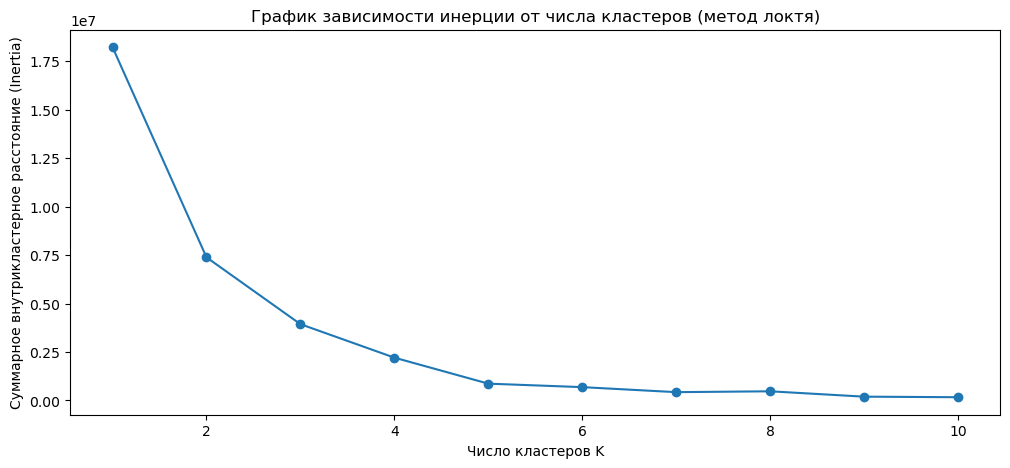

In [26]:
plt.figure(figsize=(12, 5))

for k in range(min_k, max_k + 1):
   km = KMeans(n_clusters= k)  # Создаём модель KMeans для текущего значения k
   km.fit_transform(df_means)  # Обучаем модель и получаем координаты точек в пространстве кластеров
   i.append(km.inertia_)  # Сохраняем значение инерции для текущего k

# Строим график зависимости инерции от количества кластеров
plt.plot(range(min_k, max_k + 1), i, marker='o')
plt.xlabel('Число кластеров K')  # Подпись оси X
plt.ylabel('Суммарное внутрикластерное расстояние (Inertia)')  # Подпись оси Y
plt.title('График зависимости инерции от числа кластеров (метод локтя)')  # Заголовок
plt.show()

На графике видно, что линия резко снижается при увеличении числа кластеров от 1 до 2, а затем продолжает снижаться, но уже менее значительно. Это указывает на то, что при увеличении числа кластеров до 2 происходит значительное улучшение разделения данных на кластеры. После этого, хотя инерция продолжает уменьшаться, это уменьшение становится менее выраженным, что может свидетельствовать о том, что дальнейшее увеличение числа кластеров не приводит к существенному улучшению качества кластеризации. В данном случае это может быть около 2-3 кластеров.

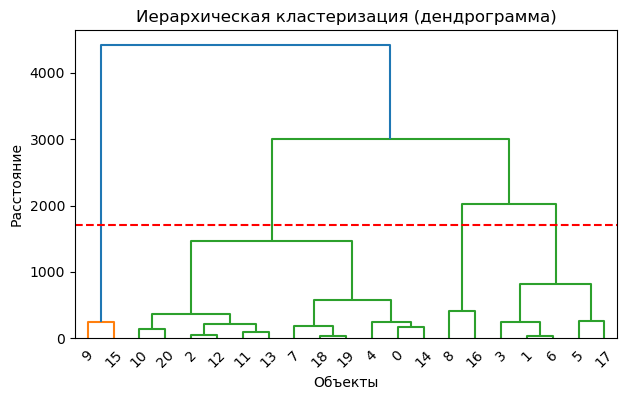

In [ ]:

# Создадим таблицу связей:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df_means, method = 'ward')

# Визуализируем таблицу связей:
plt.figure(figsize=(7, 4))  
dendrogram(linked, orientation='top')

plt.axhline(y=1700, color='r', linestyle='--')  
plt.title("Иерархическая кластеризация (дендрограмма)")
plt.xlabel("Объекты")
plt.ylabel("Расстояние")

plt.show()

**Задача 4.3.** Проведите кластеризацию, проанализируйте полученные результаты и рассчитайте средние значения по каждому кластеру.
    
После этого визуализируйте результаты, чтобы проследить зависимость признаков друг от друга. Постройте две визуализации, на которые нанесите все кластеры:
- средний чек в зависимости от количества заказов;
- количество блюд в зависимости от количества заказов.

После этого опишите каждый кластер в промежуточном выводе. 

In [28]:
kmeans = KMeans(n_clusters= 2)
labels = kmeans.fit_predict(df_means)

In [29]:
sorted_indices = np.argsort(kmeans.cluster_centers_[:, 1])
sorted_centroids = kmeans.cluster_centers_[sorted_indices]

In [30]:
# Создаём DataFrame из центроидов
centroids_df = pd.DataFrame(
   sorted_centroids,
   columns=['Количество_заказов', 'Средний_чек', 'Количество_блюд'],
   index=[f'Кластер {i + 1}' for i in range(kmeans.n_clusters)]
)

# Форматируем числа для вывода (2 знака после точки)
pd.options.display.float_format = '{:.3f}'.format

# Выводим таблицу
print(centroids_df.head())

           Количество_заказов  Средний_чек  Количество_блюд
Кластер 1             201.933     2104.444           18.000
Кластер 2              86.667     3690.473            8.500


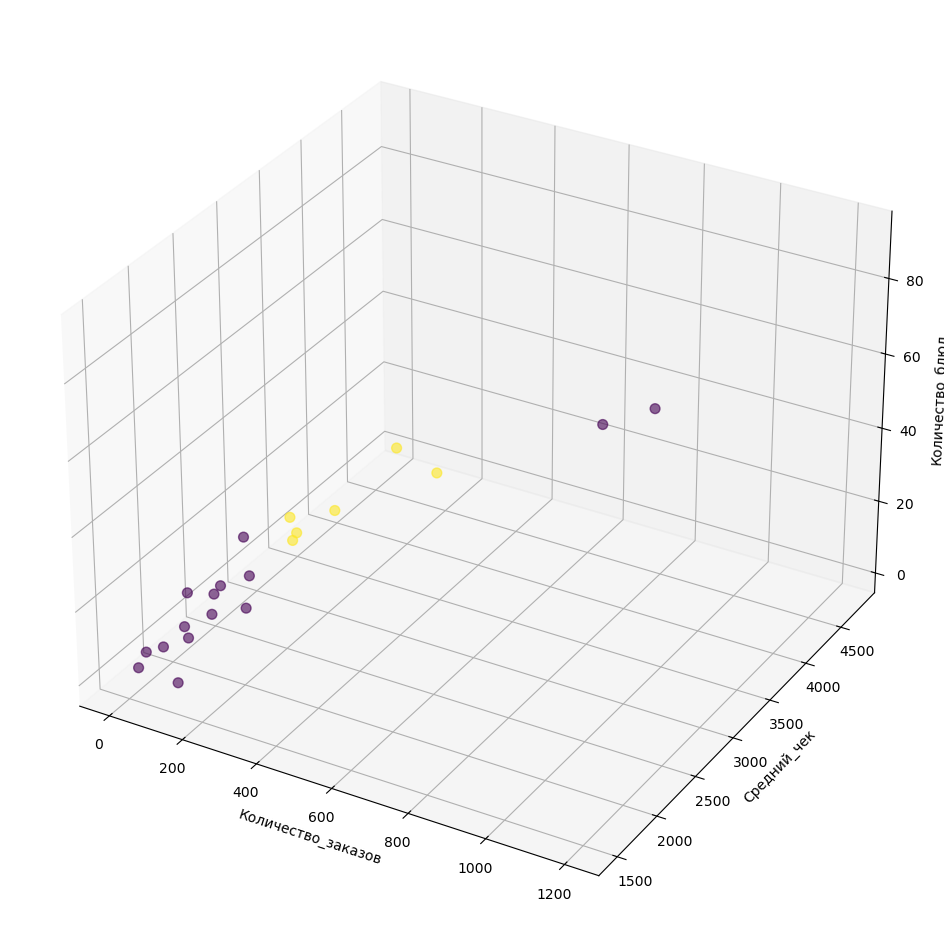

In [31]:
from mpl_toolkits.mplot3d import Axes3D  # Для 3D-графиков

# Строим 3D-график
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Строим точки, окрашенные по меткам кластера
ax.scatter(
   df_means['total_orders'], df_means['mean_revenue'], df_means['total_obj_nu'],
   c=labels, cmap='viridis', s=50, alpha=0.6
)

# Подписи осей
ax.set_xlabel('Количество_заказов')
ax.set_ylabel('Средний_чек')
ax.set_zlabel('Количество_блюд')

plt.show()

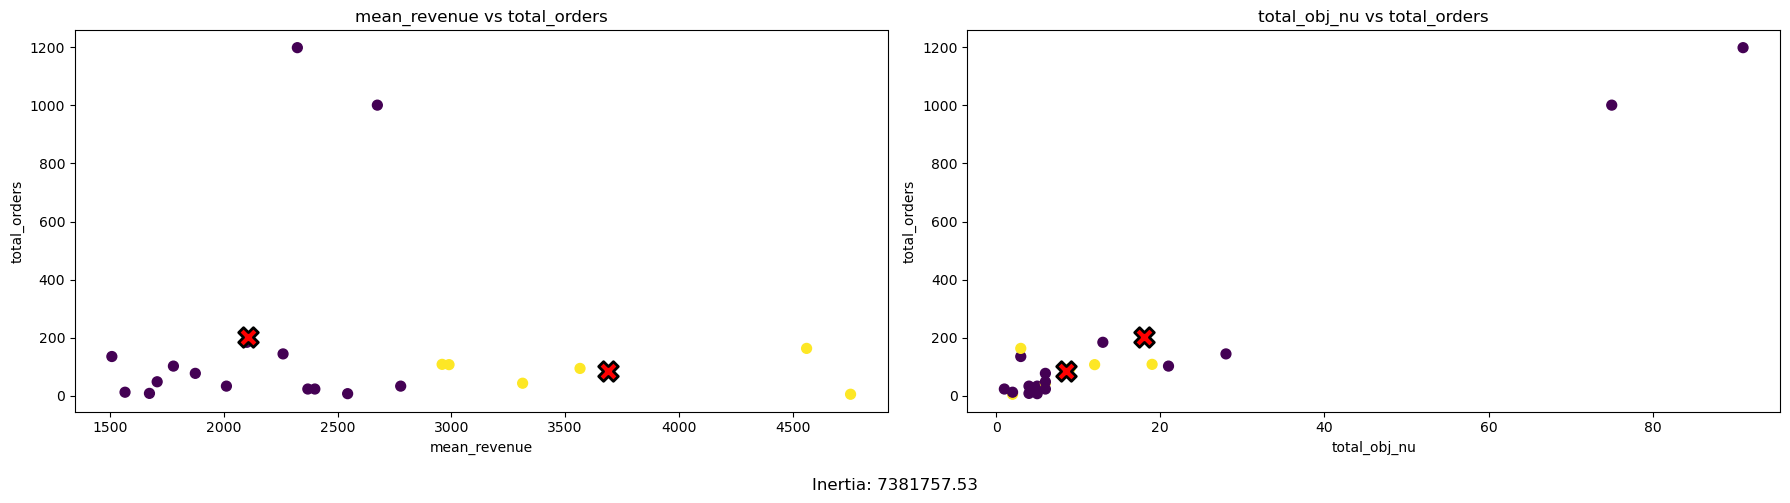

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axs = ["total_orders", "mean_revenue", "total_obj_nu"]

for i, (x_idx, y_idx) in enumerate([[1, 0], [2, 0]]):
   x_label, y_label = axs[x_idx], axs[y_idx]  # Названия признаков для осей

   # Строим точки — объекты из датафрейма, раскрашенные по меткам кластера
   axes[i].scatter(
       df_means[x_label],  # Значения по оси X
       df_means[y_label],  # Значения по оси Y
       c=labels,  # Цвет зависит от номера кластера
       cmap='viridis',  # Цветовая карта
       s=50  # Размер точек
   )

   # Строим центроиды кластеров красными крестами
   axes[i].scatter(
       sorted_centroids[:, x_idx],  # X-координаты центров
       sorted_centroids[:, y_idx],  # Y-координаты центров
       s=200,  # Размер крестов
       c='red',  # Цвет — красный
       edgecolors='black',  # Обводка — чёрная
       linewidths=2,  # Толщина обводки
       marker='X'  # Форма маркера — крест
   )

   # Подписи осей и заголовок графика
   axes[i].set_xlabel(x_label)
   axes[i].set_ylabel(y_label)
   axes[i].set_title(f'{x_label} vs {y_label}')

# Подгоняем макет, оставляя место снизу для подписи с инерцией
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Добавляем текст с СВР внизу графика (по центру)
fig.text(0.5, 0.01, f'Inertia: {kmeans.inertia_:.2f}', ha='center', fontsize=12)

# Показываем итоговый набор визуализаций
plt.show()

График 1: `Mean Revenue` vs `Total Orders`
Кластер 1, цвет: Фиолетовый
Характеристика: Это объекты с низким средним доходом (1500-2500) и небольшим количеством заказов (0-500).
Данные: Находятся на нижней части графика и преимущественно заняты большими пространствами.

Кластер 2, цвет: Желтый
Характеристика: Объекты с более высоким средним доходом (4000-5000) и количеством заказов выше 500.
Данные: Находятся выше по оси y и правой части графика.

График 2: `Total Object` Num vs `Total Orders`
Кластер 1, цвет: Фиолетовый
Характеристика: Объекты с низким количеством объектов (0-40) и низким количеством заказов (0-500).
Данные: Большинство объектов расположены в этой области.

Кластер 2, цвет: Желтый
Характеристика: Объекты с большим количеством заказов (500 и выше) и чуть выше 40 объектов.
Данные: Объекты выделяются на графике.

---

## 5. Итоговый вывод и рекомендации

Сформулируйте общий вывод. Зафиксируйте основные результаты и инсайты, которые, на ваш взгляд, помогут бизнесу улучшить продукт.

Выводы должны быть краткими и ёмкими, ведь их будут читать ваш заказчик, продуктовый менеджер и продуктовая команда.

# Основные выводы и рекомендации:

Проблемы с качеством данных:
Значительное число пропусков в ключевых колонках (`rest_id`, `object_id`, `order_id`, `revenue`, `delivery`, `commission`) сигнализирует о проблемах с полнотой данных и возможностях ошибок сбора данных. Необходимо исследовать причины пропуска данных и устранить их источник.

Анализ последовательности шагов (воронка):
Потеря пользователей происходит относительно равномерно на протяжении всей воронки, однако значительные скачки наблюдаются на этапах регистрации ("`Рег Page`"), подтверждения телефона ("`Confirm Phone`"). Для повышения конверсии необходимо упростить регистрацию и оптимизировать процесс подтверждения телефонного номера.

Поведение пользователей на мобильных устройствах:
Пользователи мобильного приложения сталкиваются с большей потерей на каждом этапе воронки продаж по сравнению с веб-версией. Особое внимание стоит уделить этапу подтверждения телефона, где конверсия падает до 60%.

Распределение доходов и частоты покупок:
Основная масса клиентов делает регулярные покупки (около 10 заказов каждый), средний чек находится в диапазоне 1500–2500 руб., что позволяет позиционировать продукты и акции соответствующим образом.

Рекомендации по оптимизации продукта:
- Упростить ввод данных на стадии регистрации и подтверждение номера телефона.
- Улучшить навигацию и простоту совершения заказа в мобильном приложении.
- Предложить скидки постоянным клиентам и бонусные системы для увеличения повторных покупок.
- Обеспечить целостность данных и точность аналитики для принятия обоснованных решений.

Этот анализ позволит выявить слабые места бизнеса и предпринять шаги по повышению эффективности работы платформы и увеличению дохода.

На основе предоставленных данных RFM-сегментации выделено 24 сегмента, каждый из которых характеризуется комбинацией параметров Recency (R), Frequency (F) и Monetary (M).

- 55.89% клиентов относятся к "недавним" покупателям (сегменты 1xx, 2xx, 3xx с R=1-3). Наибольшая доля у сегментов 211 (11.8%) и 111 (10.36%).
- Сегменты 311, 312, 313 (частые/высокие траты) составляют 22.38%. 333 (элитные клиенты) - 2.75%.
- Сегменты с низкой частотой и тратами (1xx) - 22.81%. "Потерянные" клиенты (R=3, низкие F/M) - 15.78%.

# Рекомендации по сегментам
Для ценных сегментов (311, 312, 313, 333):
- персональные менеджеры, эксклюзивные предложения
- ранний доступ к новинкам, специальные условия

Для перспективных сегментов (211, 212, 213):
- стимулирование повторных покупок
- email-рассылки с персональными предложениями
- накопительные скидки, подарки за активность

Для новых/редких клиентов (111, 112, 113):
- welcome-письма, скидка на следующую покупку
- улучшение UX, напоминания о брошенных корзинах

Для рисковых групп (низкие F/M):
- опросы о причинах низкой активности
- специальные предложения для возвращения
- анализ возможных барьеров к покупкам